# Import Python Packages

In [1]:
# Import All Necessary Libraries and Create File Paths
import os
import sys
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Modelling CNN|
import tensorflow as tf
import glob
import math
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# Define Paths

In [2]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = os.path.join(ROOT, 'wildfire-sumatera-dataset')


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-geotiff')
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image')
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask')
WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask-tfrecords')

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8.csv')
METADATA_SENTINEL_2_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_sentinel_2.csv')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'prefire')
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'prefire')
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'landsat-8')

# Folders inside
SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8')

dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH,
]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:wildfire-sumatera-dataset already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask-tfrecords already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D:wildfire-sum

# Define TFRecords Helper Functions

In [3]:
def image_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_png(value).numpy()])
    )


def int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def create_example(image, mask, label):
    height=image.shape[0]
    width=image.shape[1]
    feature = {
        "image": image_feature(image),
        "mask": image_feature(mask),
        "height": int64_feature(height),
        "width": int64_feature(width),
        "label": int64_feature(label),
    }
    
    return tf.train.Example(features=tf.train.Features(feature=feature))


def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "mask": tf.io.FixedLenFeature([], tf.string),
        "height": tf.io.FixedLenFeature([], tf.int64),
        "width": tf.io.FixedLenFeature([], tf.int64),
        "label": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_png(example["image"])
    example["mask"] = tf.io.decode_png(example["mask"])
    return example

# Create TFRecords for Landsat 8 Images and Masks

In [4]:
# Prepare Data
# Create Machine Learning Model
landsat_df = pd.read_csv(METADATA_LANDSAT_8_FILE_PATH)
# filtered_landsat_df = landsat_df[(landsat_df['image_condition']==1) & landsat_df['class_by_median']==1]
filtered_landsat_df = landsat_df[(landsat_df['image_condition']==1)]
len_images_masks = len(filtered_landsat_df)

In [9]:
for tfrec_num, row in tqdm(filtered_landsat_df.iterrows(), colour='green'):
    image_mask_path = row['folder_paths_image_mask']
    tf_record_path = os.path.join(LANDSAT_8_IMAGE_MASK_TFRECORD_FOLDER_PATH, "file_{}-{}.tfrec".format(tfrec_num, len_images_masks))
    if os.path.exists(tf_record_path):
        continue
    
    with tf.io.TFRecordWriter(tf_record_path) as writer:
        image_path = os.path.join(ROOT, image_mask_path, 'image.png')
        image = tf.io.decode_png(tf.io.read_file(image_path), dtype=tf.dtypes.uint8)
        mask_path = os.path.join(ROOT, image_mask_path, 'cleaned_mask.png')
        mask = tf.io.decode_png(tf.io.read_file(mask_path), dtype=tf.dtypes.uint8)
        example = create_example(image, mask, row['class_by_median'])
        writer.write(example.SerializeToString())
        writer.close()        

7836it [00:08, 886.10it/s] 


label: 0
Image shape: (892, 892, 3)


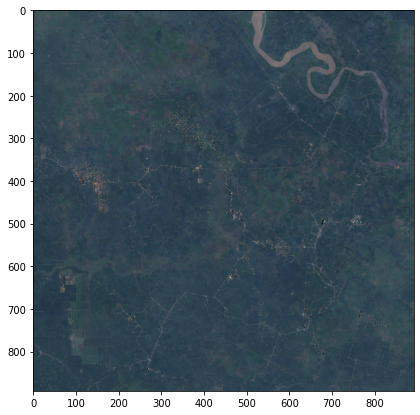

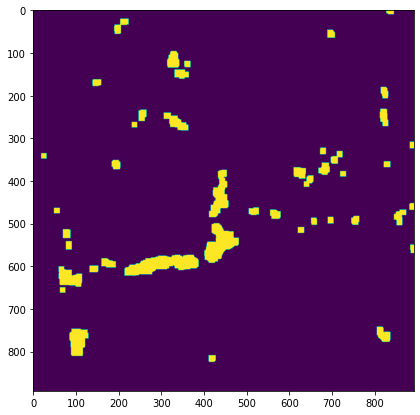

In [16]:
files = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_PATH, 'file_0-7836.tfrec')

raw_dataset = tf.data.TFRecordDataset(files)
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)

for features in parsed_dataset.take(1):
    print("label: {}".format(features['label']))
    print("Image shape: {}".format(features['image'].shape))
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy()*3)
    plt.show()
    plt.figure(figsize=(7, 7))
    plt.imshow(features["mask"].numpy()*3)
    plt.show()

# Create TFRecords for Sentinel 2 Images and Masks

In [9]:
# Prepare Data
sentinel_df = pd.read_csv(METADATA_SENTINEL_2_FILE_PATH)
filtered_sentinel_df = sentinel_df[(sentinel_df['image_condition']==1)]
len_images_masks = len(filtered_sentinel_df)

In [17]:
for tfrec_num, row in tqdm(filtered_sentinel_df.iterrows(), colour='green'):
    image_mask_path = row['folder_paths_image_mask']
    tf_record_path = os.path.join(SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH, "file_{}-{}.tfrec".format(tfrec_num, len_images_masks))
    if os.path.exists(tf_record_path):
        continue
    
    with tf.io.TFRecordWriter(tf_record_path) as writer:
        image_path = os.path.join(ROOT, image_mask_path, 'image.png')
        image = tf.io.decode_png(tf.io.read_file(image_path), dtype=tf.dtypes.uint8)
        mask_path = os.path.join(ROOT, image_mask_path, 'cleaned_mask.png')
        mask = tf.io.decode_png(tf.io.read_file(mask_path), dtype=tf.dtypes.uint8)
        example = create_example(image, mask, row['class_by_median'])
        writer.write(example.SerializeToString())
        writer.close()        

7829it [56:48,  2.30it/s]  


D:wildfire-sumatera-dataset\wildfire-sumatera-image-mask-tfrecords\sentinel-2\file_7000-7829.tfrec
label: 0
Image shape: (892, 891, 3)


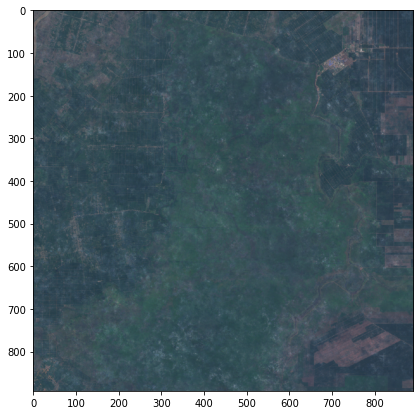

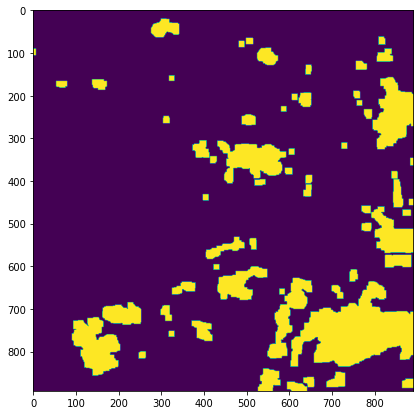

In [21]:
files = os.path.join(SENTINEL_2_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'file_7000-7829.tfrec')
print(files)

raw_dataset = tf.data.TFRecordDataset(files)
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)

for features in parsed_dataset.take(1):
    print("label: {}".format(features['label']))
    print("Image shape: {}".format(features['image'].shape))
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy()*3)
    plt.show()
    plt.figure(figsize=(7, 7))
    plt.imshow(features["mask"].numpy()*3)
    plt.show()